### Importing Libraries

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Understanding

### Data Path

In [38]:
reviews_path = "..\\..\\data\\reviews.csv"
talents_path = "..\\..\\data\\talents.csv"
users_path = "..\\..\\data\\users.csv"
tags_path = "..\\..\\data\\tags.csv" 

### Read CSV to DataFrame

In [39]:
reviews_df = pd.read_csv(reviews_path)
talents_df = pd.read_csv(talents_path)
users_df = pd.read_csv(users_path)
tags_df = pd.read_csv(tags_path)

### Data Exploration

In [40]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1026 non-null   object
 1   talent_id  1026 non-null   object
 2   rating     1026 non-null   int64 
 3   review     1026 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.2+ KB


In [41]:
talents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   talent_id           509 non-null    object
 1   talent_name         509 non-null    object
 2   talent_gender       509 non-null    object
 3   talent_birth_date   509 non-null    object
 4   talent_age          509 non-null    int64 
 5   talent_location     509 non-null    object
 6   talent_tags         509 non-null    object
 7   talent_description  509 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.9+ KB


In [42]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           830 non-null    object
 1   user_name         830 non-null    object
 2   user_gender       830 non-null    object
 3   user_birth_date   830 non-null    object
 4   user_age          830 non-null    int64 
 5   user_location     830 non-null    object
 6   user_tags         830 non-null    object
 7   user_preferences  830 non-null    object
dtypes: int64(1), object(7)
memory usage: 52.0+ KB


In [43]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     191 non-null    object
 1   type    191 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


# Data Preparation

## Get Average Talents Rating

### Joining DataFrames

In [44]:
reviews_talents = pd.merge(reviews_df, talents_df, on='talent_id')
reviews_talents.head()

,user_id,talent_id,rating,review,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description
0,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,4,"Talent ini sangat kreatif dalam fotografi, has...",Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...
1,600687d6-bf67-406d-a50e-768e3d2dd53d,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,3,Fotografer talent ini memiliki kemampuan yang ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...
2,6a58a9cc-b016-4ff3-83d4-c41e735bf4df,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,5,Talent ini memiliki keterampilan mendengarkan ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...
3,e2f14ece-ed75-43a7-a57d-ee476a6cdceb,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,4,Pengalaman wisata dengan talent ini sangat men...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...
4,6e1d2cf7-c56b-4b19-8b2b-4c1310a66d35,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,3,Astrografi talent ini memberikan pengalaman ya...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...


### Get Average Talents Rating

In [45]:
talents_average_rating = reviews_talents.groupby('talent_id')['rating'].mean()
talents_average_rating.head()

talent_id
00627d20-528b-4c4e-92de-d97c12c151d1    5.000000
011fc393-1411-49d2-8218-9dda2d8667c5    3.000000
028b55d3-2c32-4410-a5e0-2c5526732f23    4.333333
029b75a9-3275-4de9-b923-317b8baf7693    3.500000
03d149b4-056b-4609-bc16-fc8bea09ff80    4.000000
Name: rating, dtype: float64

### Add Average Talents Rating to Talent DataFrame

In [46]:
talents_df['average_rating'] = talents_average_rating[talents_df['talent_id']].to_numpy()
talents_df.head()

,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,average_rating
0,fc0f6e4b-c397-40a4-a24c-d08b92aedc45,Pribadi Anwar Wicaksono,L,24/4/1992,31,"Banten, Cilegon",Badminton|Berjiwa petualang|Kpopers|Hiking|Ola...,"Saya sangat menyukai Kpop, girlband favorit sa...",3.0
1,674c14d8-ed13-471a-aabf-ceef4e5bc44b,Perdana Anshari,L,10/3/2005,18,"Kalimantan Utara, Tarakan",Desain|Inovatif|Optimis|Seniman|Kreatif,Saya adalah seorang seniman visual yang mencin...,4.0
2,f2427a83-eb72-47dd-aeaf-cf131b5cefa2,Dwi Nur Septasya Nahda,P,10/3/2002,21,"Sumatera Selatan, Pagaralam",Petualangan|Bersepeda|Kutu buku|Traveling|Kuliner,Pecinta kuliner dan petualangan! Saya suka men...,5.0
3,ac56a04d-aa98-4591-8e8c-2b188040c114,Asmara Tamara Liranda,P,31/3/1992,31,"Sumatera Barat, Lima Puluh Kota",Analitis|Coding|Inovatif|Teknologi|Programmer,Seorang pengembang perangkat lunak yang bersem...,5.0
4,d7a31753-7f7a-4d3a-80ec-bca26e578735,Adisyafitri Oky Septasya,P,12/7/1990,33,"Kalimantan Timur, Samarinda",Ambisius|Membaca|Cerdas|Pengajar|Visioner,Pengajar bahasa Inggris yang juga pencinta lit...,4.5


## Encoding Categorical Data (Talent Tags)

### Get All Tags

In [47]:
numpy_tags = tags_df['tag'].to_numpy().reshape(-1, 1)

numpy_tags.shape

(191, 1)

### Fitting Tags to One Hot Encoder

In [48]:
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded_tags = onehot_encoder.fit_transform(numpy_tags)

### Transforming Talent Tags to One Hot Encoder

In [49]:
onehot_encoded_talent_tags = []
talent_tags = talents_df['talent_tags'].str.split('|').to_numpy()

for talent_tag in talent_tags:
    talent_tag = [tag for tag in talent_tag if tag != '']
    talent_tag = np.array(talent_tag).reshape(-1, 1)

    onehot_encoded_talent_tag = onehot_encoder.transform(talent_tag)
    # combine the one hot encoded talent tags into one array
    onehot_encoded_talent_tag = np.sum(onehot_encoded_talent_tag, axis=0)
    onehot_encoded_talent_tags.append(onehot_encoded_talent_tag)

onehot_encoded_talent_tags = np.array(onehot_encoded_talent_tags)

onehot_encoded_talent_tags.shape

(509, 191)

### Testing One Hot Encoder

In [50]:
user_1 = users_df.iloc[0]

user_1_talent_tags = user_1['user_tags']

user_1_talent_tags = [tag for tag in user_1_talent_tags.split('|') if tag != '']

user_1_talent_tags = onehot_encoder.transform([[tag] for tag in user_1_talent_tags])

user_1_talent_tags = np.sum(user_1_talent_tags, axis=0)

print(user_1_talent_tags)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Modeling

## SystemRecomendationModel

In [51]:
class KMeansClusteringSystemRecommendations():
    data_cluster = None
    r_k =[]
    data = np.array([])
    wcss = []
    elbow_point = 0
    kmeans = None

    def __init__(self, data):
        self.data = np.copy(data)
        self.r_k = np.arange(1, data.shape[0] + 1).tolist()

    def evaluate(self, start=1, end=None):
        if end == None:
            end = self.data.shape[0] + 1

        print("Evaluating kmeans for k = " + str(start) + " to k = " + str(end))
        for i in range(start, end):
            kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
            kmeans.fit(self.data)
            print("Fitting kmeans for k = " + str(i) + " with inertia = " + str(kmeans.inertia_))
            self.wcss.append(kmeans.inertia_)
        print("Evaluating kmeans for k = " + str(start) + " to k = " + str(end) + " completed")

    def find_elbow_point(self,start=0,end=-1, is_plot=False):
        copy_rk = self.r_k.copy()
        copy_wcss = self.wcss.copy()
                
        copy_rk = copy_rk[start:end]
        copy_wcss = copy_wcss[start:end]

        x1, y1 = copy_rk[0], copy_wcss[0]
        x2, y2 = copy_rk[len(copy_rk)-1], copy_wcss[len(copy_wcss)-1]
    
        distances = []
        for i in range(len(copy_wcss)):
            x0 = copy_rk[i]
            y0 = copy_wcss[i]
            numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
            denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
            distances.append(numerator/denominator)
            
        
        if is_plot:
            plt.plot(copy_rk[:len(copy_wcss)], copy_wcss)
            plt.plot([x1, x2], [y1, y2], '--')
            plt.plot(copy_rk[distances.index(max(distances))], copy_wcss[distances.index(max(distances))], marker='o', markersize=10, label="Elbow")
            plt.xlabel('k')
            plt.ylabel('wcss')

        return distances.index(max(distances)) + 1

    def train(self, k = elbow_point):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(self.data)
        self.kmeans = kmeans

    def cluster_count(self):
        self.data_cluster = self.kmeans.predict(self.data)
        cluster_count = np.zeros(self.kmeans.n_clusters)
        for i in range(len(self.data_cluster)):
            cluster_count[self.data_cluster[i]] += 1
        
        return cluster_count

    def plot_cluster(self):
        pca = PCA(n_components=2)
        pca.fit(self.data)
        pca_data = pd.DataFrame(pca.transform(self.data))
        plt.scatter(pca_data[0], pca_data[1], c=self.data_cluster, cmap='rainbow')

    def predict(self, data):
        return self.kmeans.predict(data)

    def get_centroids(self):
        return self.kmeans.cluster_centers_

    def get_labels(self):
        return self.kmeans.labels_

    def get_inertia(self):
        return self.kmeans.inertia_
    
    def get_kmeans(self):
        return self.kmeans

    def get_wcss(self):
        return self.wcss

    def get_r_k(self):
        return self.r_k

    def get_k(self):
        return self.elbow_point

    def get_data(self):
        return self.data        

### Initializing Model

In [52]:
sys_rec = KMeansClusteringSystemRecommendations(onehot_encoded_talent_tags)


# Evaluation (Elbow Method)

### Fitting Model (Cluster with Every K Possible to Find the Best K Value)

In [53]:
sys_rec.evaluate()

Evaluating kmeans for k = 1 to k = 510
Fitting kmeans for k = 1 with inertia = 2273.0687622789787
Fitting kmeans for k = 2 with inertia = 2108.1683826333283
Fitting kmeans for k = 3 with inertia = 1973.9478981735738
Fitting kmeans for k = 4 with inertia = 1906.6489771567356
Fitting kmeans for k = 5 with inertia = 1844.1207954183712
Fitting kmeans for k = 6 with inertia = 1792.320850827015
Fitting kmeans for k = 7 with inertia = 1766.9864055062792
Fitting kmeans for k = 8 with inertia = 1723.8818230353966
Fitting kmeans for k = 9 with inertia = 1693.840809881356
Fitting kmeans for k = 10 with inertia = 1667.4703866209966
Fitting kmeans for k = 11 with inertia = 1649.9509059186034
Fitting kmeans for k = 12 with inertia = 1625.3811920349876
Fitting kmeans for k = 13 with inertia = 1602.5255067473847
Fitting kmeans for k = 14 with inertia = 1594.1388852386299
Fitting kmeans for k = 15 with inertia = 1577.3204399102444
Fitting kmeans for k = 16 with inertia = 1561.730514882586
Fitting kmean

### Find Kmeans Elbow Score

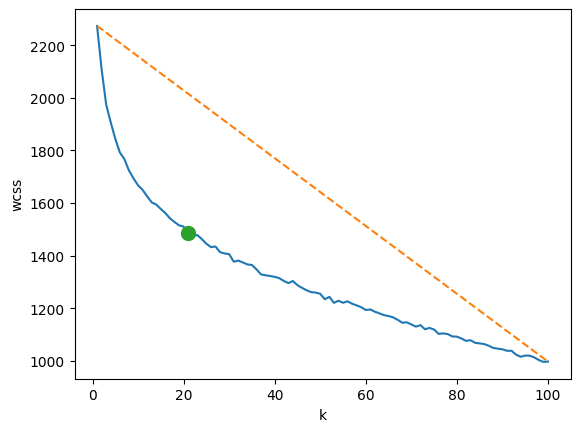

In [62]:
k = sys_rec.find_elbow_point(is_plot=True, start=0, end=100)

### Training Model with Elbow Score

In [63]:
sys_rec.train(k)

### Get Cluster Items Count

In [64]:
cluster_count = sys_rec.cluster_count()
for i in range(len(cluster_count)):
    print("Cluster " + str(i) + ": " + str(cluster_count[i]))

Cluster 0: 25.0
Cluster 1: 61.0
Cluster 2: 20.0
Cluster 3: 16.0
Cluster 4: 26.0
Cluster 5: 26.0
Cluster 6: 9.0
Cluster 7: 32.0
Cluster 8: 34.0
Cluster 9: 36.0
Cluster 10: 18.0
Cluster 11: 15.0
Cluster 12: 24.0
Cluster 13: 14.0
Cluster 14: 23.0
Cluster 15: 23.0
Cluster 16: 18.0
Cluster 17: 44.0
Cluster 18: 11.0
Cluster 19: 17.0
Cluster 20: 17.0


### Plot Clusters

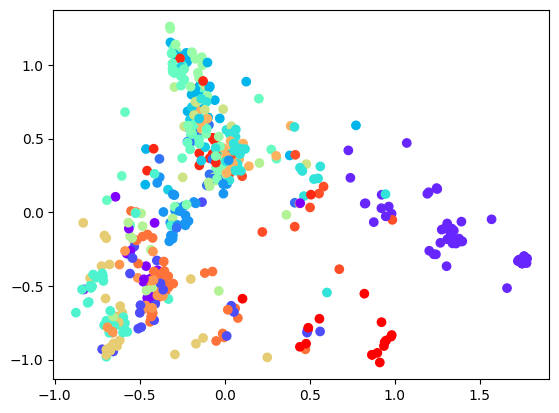

In [65]:
sys_rec.plot_cluster()

# Prediction

### One Hot Encoding User Tags

In [69]:
user = users_df.iloc[10]

user_talent_tags = user['user_tags']

user_talent_tags = [tag for tag in user_talent_tags.split('|') if tag != '']

user_talent_tags = onehot_encoder.transform([[tag] for tag in user_talent_tags])

user_talent_tags = np.sum(user_talent_tags, axis=0)

user_talent_tags

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Predict the Cluster

In [70]:
user_cluster_prediction = sys_rec.predict([user_talent_tags])

### Show 7 Recommended Talents sorted by Average Rating

In [71]:
talent_recommendations = talents_df[sys_rec.get_labels() == user_cluster_prediction[0]].sort_values(by='average_rating', ascending=False)

print(user['user_tags'])

talent_recommendations.head(7)

Bernyanyi|Bersepeda|Badminton|Sutradara|Disiplin


,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,average_rating
413,7f2f85fb-b6ed-4707-8763-2cc67c398b30,Fauzi Maulana Rahmad Yahya,L,15/1/1987,36,"Aceh, Banda Aceh",Intelektual|Disiplin|Perfeksionis|Pengajar|Vid...,Seorang pengajar matematika yang menyampaikan ...,5.000000
34,a6cf12e1-a125-4b00-bf43-cb87cd934152,Mulyadi Ahmad,L,1/3/2005,18,"Jawa Timur, Kediri",Sabar|Membaca|Optimis|Pengajar|Penulis,Saya seorang penulis dan pelatih penulisan kre...,5.000000
402,7f56707f-7aa2-432d-99b5-0c53aa7b58a3,Sindi Julia Wahyuningrum Pokkombong,P,5/8/1997,26,"Jawa Tengah, Tegal",Kesehatan|Pengajar|Disiplin|Perfeksionis|Intel...,Seorang pengajar fisika yang memberikan pembel...,5.000000
210,fa9afd16-3d8d-4c25-a2a1-d7b86758a35a,Ashley Zakiyah Hutami,P,28/1/1982,41,"Jawa Barat, Bekasi",Pengajar|Manajemen|Visioner|Bisnis|Disiplin,Pengajar bisnis yang membantu individu dan per...,5.000000
158,6db4c41e-e232-4598-b08b-6e36729fa98d,Ervie Julia Wear Nurmaydani,P,17/10/1991,32,"Riau, Dumai",Melukis|Seniman|Pengajar|Disiplin|Seni,Pengajar seni rupa dengan keahlian dalam meluk...,5.000000
118,8e4b7d2e-25a8-4ece-bb9b-83963bf2e8e4,Putri Aniesyah Suraya Julia,P,25/1/1990,33,"DI Yogyakarta, Yogyakarta",Sabar|Cerdas|Pengajar|Disiplin|Olahraga,Pengajar Pilates yang berdedikasi untuk mening...,5.000000
47,8e1580d7-e778-457c-b77a-990c6a37fd70,Najibah Karina,P,16/9/1984,39,"Sumatera Utara, Padangsidimpuan",Sabar|Cerdas|Pengajar|Catur|Intelektual,Seorang pendidik yang berkomitmen untuk member...,4.666667
